In [1]:
from env import env
from agent import agent
import utils
from tqdm import tqdm
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from IPython.display import HTML
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LogNorm

%load_ext autoreload
%autoreload 2


## Model-free

This time, we don't know the environment. We need to compute an estimate of the optimal policy.


If all trajectories are finite:
1. sample a set of finite trajectories (arrive at termination state);
2. average returns;

These are the AGENT'S POLICIES. The Probability matrix of the environment does not have anything to do with these.

In [2]:
def policy_function_right(state):
    return 'right'

def policy_function_left(state):
    return 'left'

def policy_function_to_extremes(state):
    return 'left' if state.number <= 3 else 'right'

def policy_function_to_middle(state):
    return 'left' if state.number >3 else 'right'

In [3]:
agent = agent(policy_function_right)

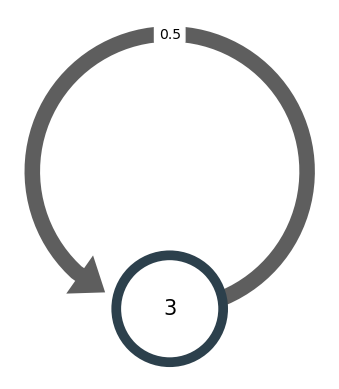

In [4]:
utils.visualize_policy(agent.my_env,agent)

In [5]:
agent.my_env.states

In [6]:
agent.easy_policy

{3: 'right'}

[3, 3, 3, 3, 3, 4, 5, 6, 6, 6]
[6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
[3, 4, 5, 5, 6, 6, 6, 6, 6, 6]
[3, 4, 5, 6, 6, 6, 6, 6, 6, 6]
[5, 6, 6, 6, 6, 6, 6, 6, 6, 6]
[6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
[3, 4, 5, 6, 6, 6, 6, 6, 6, 6]
[5, 6, 6, 6, 6, 6, 6, 6, 6, 6]


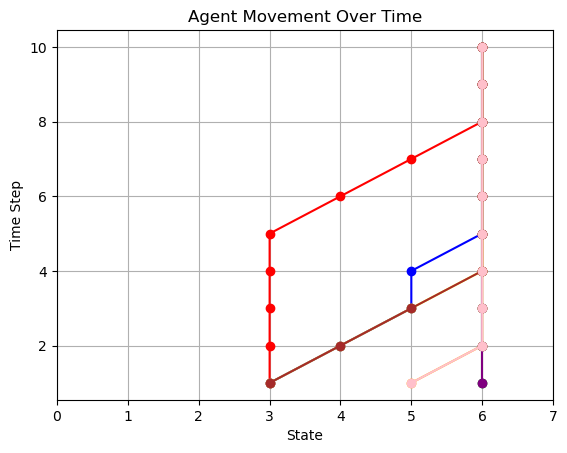

In [7]:
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'brown', 'pink']

for i in range(len(colors)):
    episode = agent.sample_episode(10, random_first_state=True)  
    print(episode)
    time_steps = range(1, len(episode) + 1)
    plt.plot(episode, time_steps, marker='o', linestyle='-', color=colors[i])

plt.xlabel('State')
plt.ylabel('Time Step')
plt.xticks(np.arange(0, 8, step=1))
plt.title('Agent Movement Over Time')
plt.grid(True)

Let's try making a step.

In [8]:
agent.step().name 

'right'

In [9]:
agent.make_step(   agent.step()      ).number

3

In [10]:
agent.easy_policy

{3: 'right', 4: 'right', 5: 'right', 6: 'right'}

In [11]:
[state.number for state in agent.my_env.states]

[3, 4, 5, 6]

In [12]:
agent.sample_episode(10)

[3, 3, 4, 5, 6, 6, 6, 6, 6, 6]

In [13]:
agent.reset_state()

In [14]:
agent.evaluate_policy_first_visit_montecarlo(1000)

{3: 0.712109375,
 4: 2.0171984594188377,
 5: 5.852612652749491,
 6: 18.18186532079646}

In [15]:
agent.evaluate_policy_every_visit_montecarlo(1000)

{3: 0.7027261995916284,
 4: 2.0202348845960865,
 5: 5.916523972602739,
 6: 15.99218565001184}

In [16]:
agent.evaluate_policy_incremental(1000)

{3: 0.7030353156887765,
 4: 2.0185688973908635,
 5: 5.8336316830332775,
 6: 16.007838455149443}

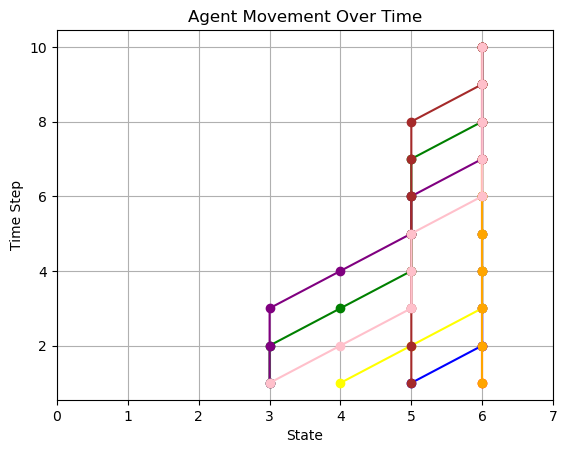

In [17]:
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'brown', 'pink']

for i in range(len(colors)):
    episode = agent.sample_episode(10, random_first_state=True)  
    time_steps = range(1, len(episode) + 1)
    plt.plot(episode, time_steps, marker='o', linestyle='-', color=colors[i])

plt.xlabel('State')
plt.ylabel('Time Step')
plt.xticks(np.arange(0, 8, step=1))
plt.title('Agent Movement Over Time')
plt.grid(True)

## Policy Improvement

In [18]:
agent.improve_policy()

{(3, 'left'): 0.1904296875, (3, 'right'): 0.44227233013654094, (4, 'left'): 0.6080078125, (4, 'right'): 1.4484943674176776, (5, 'left'): 2.0986328125, (5, 'right'): 5.241847264332966, (6, 'left'): 17.1109375, (6, 'right'): 16.7537900135257, (2, 'left'): 0.059382891414141416, (2, 'right'): 0.13214936127533783, (1, 'left'): 301767.6966934975, (1, 'right'): 0.0387253668009206, (0, 'left'): 1674835.5324835526, (0, 'right'): 1344151.8868553883}


{(3, 'left'): 0,
 (3, 'right'): 1,
 (4, 'left'): 0,
 (4, 'right'): 1,
 (5, 'left'): 0,
 (5, 'right'): 1,
 (6, 'left'): 1,
 (6, 'right'): 0,
 (2, 'left'): 0,
 (2, 'right'): 1,
 (1, 'left'): 1,
 (1, 'right'): 0,
 (0, 'left'): 1,
 (0, 'right'): 0}

In [19]:
agent.easy_policy

{3: 'right',
 4: 'right',
 5: 'right',
 6: 'left',
 2: 'right',
 1: 'left',
 0: 'left'}

In [20]:
for i in range(10):
    agent.improve_policy()

{(3, 'left'): 0.20546875, (3, 'right'): 0.5013528326837416, (4, 'left'): 0.6037109375, (4, 'right'): 1.4162139892578125, (5, 'left'): 1.784375, (5, 'right'): 3.7858908925227395, (6, 'left'): 14.194270542689733, (6, 'right'): 11.22341579861111, (2, 'left'): 150839.902734375, (2, 'right'): 0.1634478519668737, (1, 'left'): 659793.1690705129, (1, 'right'): 156598.11262376237, (0, 'left'): 1865750.8131153304, (0, 'right'): 1139008.0686475409}
{(3, 'left'): 38047.0021484375, (3, 'right'): 0.5086027817919075, (4, 'left'): 0.5603515625, (4, 'right'): 1.4833020950112108, (5, 'left'): 1.5404296875, (5, 'right'): 3.8540453059230306, (6, 'left'): 14.25271602769972, (6, 'right'): 11.448372521760154, (2, 'left'): 200673.7889056225, (2, 'right'): 52678.149601862984, (1, 'left'): 614387.1585264901, (1, 'right'): 212034.97023809524, (0, 'left'): 1848315.4831099561, (0, 'right'): 1100685.586734694}
{(3, 'left'): 62184.380941064635, (3, 'right'): 11680.1591796875, (4, 'left'): 16953.514453125, (4, 'right

In [21]:
agent.easy_policy

{3: 'left', 4: 'left', 5: 'left', 6: 'left', 2: 'left', 1: 'left', 0: 'right'}

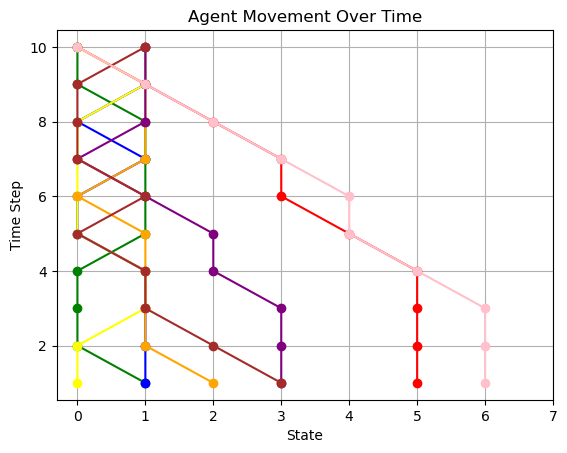

In [22]:
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'brown', 'pink']

for i in range(len(colors)):
    episode = agent.sample_episode(10, random_first_state = True)  
    time_steps = range(1, len(episode) + 1)
    plt.plot(episode, time_steps, marker='o', linestyle='-', color=colors[i])

plt.xlabel('State')
plt.ylabel('Time Step')
plt.xticks(np.arange(0, 8, step=1))
plt.title('Agent Movement Over Time')
plt.grid(True)